<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/MLP_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow2 - tf.Keras**

In [32]:
import tensorflow as tf
from tensorflow import keras  # tf.keras implements the Keras API plus some extra TensorFlow-specific features
tf.__version__, keras.__version__

('2.2.0', '2.3.0-tf')

## **Loading Dataset (Fashion MNIST)**

In [0]:
''' When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, 
one important difference is that every image is represented as a 28×28 array 
rather than a 1D array of size 784. Moreover, the pixel intensities are 
represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0)
'''
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [34]:
print(X_train_full.shape, X_train_full.dtype)
print(y_train_full.shape, y_train_full.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)
print(X_test[0])

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37

## **Preprocessing Data**
> Scaling pixel intensities

In [0]:
# scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats)
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

## **Constructing Model (Classification MLP/ Multi-Layer Perceptron)**

In [0]:
model = keras.models.Sequential()
# or keras.layers.InputLayer as the first layer, setting shape=[28,28]
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # converts each input image into a 1D array, X.reshape(-1,1)
model.add(keras.layers.Dense(300, activation="relu"))  # activation=keras.activations.relu
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))  # output layer  # one neuron per class (exclusive classes)

'''
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
]) ''';

# For a non-default initialisation method, can set kernel_initializer (kernel is another 
# name for the matrix of connection weights) or bias_initializer when creating the layer

In [38]:
model.summary()  
# (None means the batch size can be anything)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.layers

In [41]:
model.layers[1].name, model.get_layer('dense_9').name

('dense_9', 'dense_9')

In [45]:
model.get_layer('dense_9').get_weights()  # For Dense layers: connection weights and the bias terms
# model.get_layer('dense_9').set_weights()

[array([[-0.04753353, -0.0654764 , -0.01731009, ..., -0.05350191,
          0.02187178, -0.03869944],
        [-0.01725776,  0.0270275 , -0.06347821, ...,  0.03505491,
          0.05521537, -0.03213964],
        [-0.044381  , -0.06219188,  0.03400196, ..., -0.02033301,
          0.05526911,  0.07324813],
        ...,
        [-0.05890452,  0.01465198,  0.05489603, ..., -0.01769911,
         -0.02730787, -0.06942713],
        [-0.02435769,  0.05153173, -0.03233034, ...,  0.01169031,
          0.07311046, -0.05020538],
        [-0.04423298,  0.03725109,  0.0739962 , ..., -0.03832904,
          0.03750382, -0.03568053]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

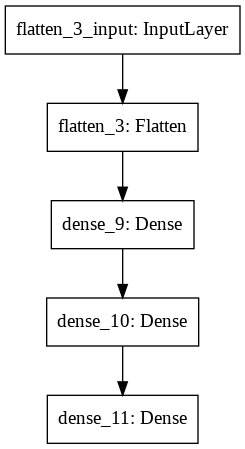

In [48]:
keras.utils.plot_model(model)

In [50]:
hidden1 = model.get_layer('dense_9')
weights, biases = hidden1.get_weights()
weights, weights.shape, biases, biases.shape  # the shape of the weight matrix depends on the number of inputs

(array([[-0.04753353, -0.0654764 , -0.01731009, ..., -0.05350191,
          0.02187178, -0.03869944],
        [-0.01725776,  0.0270275 , -0.06347821, ...,  0.03505491,
          0.05521537, -0.03213964],
        [-0.044381  , -0.06219188,  0.03400196, ..., -0.02033301,
          0.05526911,  0.07324813],
        ...,
        [-0.05890452,  0.01465198,  0.05489603, ..., -0.01769911,
         -0.02730787, -0.06942713],
        [-0.02435769,  0.05153173, -0.03233034, ...,  0.01169031,
          0.07311046, -0.05020538],
        [-0.04423298,  0.03725109,  0.0739962 , ..., -0.03832904,
          0.03750382, -0.03568053]], dtype=float32),
 (784, 300),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0

## **Compiling Model**

### ***Loss***

"sparse_categorical_crossentropy" loss if sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case) and exclusive classes.

"categorical_crossentropy" loss if one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3).

"binary_crossentropy" loss if binary classi‐ fication (with one or more binary labels) (with "sigmoid" (i.e., logistic) activation function in the output layer)

To convert sparse labels (i.e., class indices) to one-hot vector labels, use keras.utils.to_categorical().
To go the other way round, you can just use the np.arg max() function with axis=1.

### ***Optimiser***

Training model/ Keras performing the backpropagation algorithm reverse-mode autodiff + Stochastic Gradient Descent

In [0]:
model.compile(loss="sparse_categorical_crossentropy",  # == loss=keras.losses.sparse_categorical_crossentropy
              optimizer="sgd",  # == optimizer=keras.optimiz ers.SGD()
              metrics=["accuracy"])  # == metrics=[keras.metrics.sparse_categorical_accuracy] (when using this loss)
